<font color="#CC3D3D"><p>
# 05. 토픽 모델링(LSA)

<font color="#green"><p>
## 토픽 모델링(LSA)

### 토픽 모델링

- 텍스트에 대한 비지도 학습

- 문서의 단어빈도에 영향을 미치는 잠재변수를 가정

- 위의 잠재변수를 '토픽(topic)'이라고 함

- 일상적 의미에서 토픽과는 다름

-> 더 편한 결과를 찾아서 쓰면 된다

### 토픽 모델링의 방법

>행렬 분해에 의한 방법   <- 이쪽을 좀 더 사용

- Latent Semantic Analysis
- Non-negative Matrix Factorization

확률 뷴포에 의한 방법

- Latent Dirichlet Allocation

<font color="#green"><p>
## 잠재 의미 분석

### 잠재 의미 분석(Latent Semantic Analysis)

- 문서 단어 행렬을 여러 행렬의 곱으로 분해하는 방법
    - 문서-토픽 행렬: 문서별 토픽
    - 토픽-단어 행렬: 단어별 토픽

- 토픽이 여러 변수라고 가정
- 여러 토픽들에 가중치를 곱하여 더하면 문서 단어 행렬이 된다고 가정
- 토픽들은 단어 빈도의 분산을 설명
- 수학적으로는 주성분분석과 거의 비슷

### 행렬(Matrix)

- 수를 사각형 형태로 배열한 것. 간단히 생각하면 표

- 예) 문서 단어 "행렬"

- 행렬은 일반적인 수와 비슷하게 더하거나, 곱할 수 있음

- mxn크기의 행렬은 mxk크기의 행렬과 kxn크기의 행렬의 곱으로 표현 가능

- 선형 모형 y=wx+b도 행렬의 곱셈 형태로 나타낼 수 있음

### LSA의 기본 아이디어

- 문서 단어 행렬 X를 ZW형태로 표현
- 차원 축소: 단어보다 토픽의 수가 적음(n >k)

### LSA의 특징

- 계산이 비교적 단순

- 통계학에서 매우 많이 사용하는 기법

- 토픽의 해석이 어려움

- 차원의 수를 정하기 어려움

- 해가 무수히 많음

### 행렬분해

- 하나의 행렬을 여러 개의 행렬의 곱 형태로 나타내는것

    - LU분해
    - QR분해
    - 촐래스키 분해
    - 고유값 분해(eigen decomposition)
    - 특이값 분해(Singular Value Decomposition)

### 차원축소

- TDM(Truncated SVD)은 m개의 문서를 표현하기 위해 n가지 단어로 표현
- U*는 m개의 문서를 k가지 토픽으로 표현
- n>k 이므로 문서를 나타내는 차원이 축소되었다고 이해할 수 있음


- 차원 축소를 하는 이유:
    - 문서들이 단어가 아닌 의미상으로 재배치
    - 동음이의어, 오탈자 등이 (어느정도)처리됨
    - 문서에 존재하는 noise가 줄어 더 잘 분류됨

### LSA실습: 명사 추출 함수

In [2]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi() 
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

### LSA 실습: 샴푸 특허 데이터

- 데이터

In [3]:
import pandas as pd
df = pd.read_excel('data/patents.xlsx')

- 문서 단어 행렬

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer= extract_nouns, min_df=10) #min_df : 최소 문서수
dtm = cv.fit_transform(df.abstract)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### 고빈도 단어 보기

In [5]:
word_count = pd.DataFrame({
    'word': cv.get_feature_names_out(),
    'count': dtm.sum(axis=0).flat
})

word_count.sort_values('count', ascending=False).head(20)

,word,count
145,샴푸,972
83,물,737
92,발명,671
262,조성,615
137,상기,485
80,모발,475
286,추출물,474
315,포함,447
114,부,421
66,량,362


### SVD 적용

- 문서 단어 행렬에 SVD 적용, 100차원으로 축소

In [6]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=14, random_state=1234)
doc_emb = svd.fit_transform(dtm)

### 스크리 플롯

- TruncatedSVD에서 "설명된 분산"의 시각화
    - PCA와 다르게 완전히 정렬되어 있지 않음

- 절벽 밑의 비탈(scree)모양

- 완만한 경사가 시작하는 부분이 적정한 컴포넌트의 수

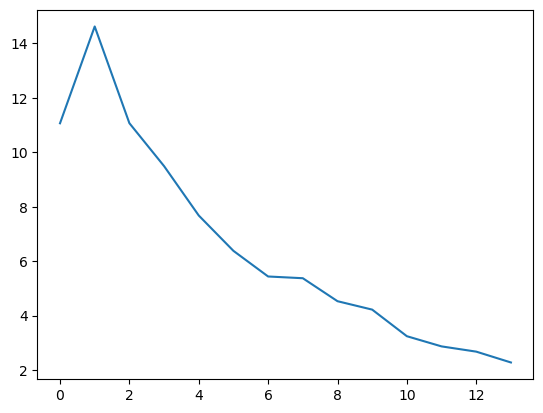

In [7]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)
plt.show()

<font color="#green"><p>
## 단어 임베딩과 유사도

### 단어 임베팅

- 단어를 낮은 차원의 벡터로 나타내는 것

- 단어의 의미를 좌표로 나타내는 것 또는 수치화

- 의미가 비슷한 단어들은 비슷한 값을 가져야함

- LSA의 단어-토픽 행렬도 일종의 단어 임베딩

- 단어 임베딩의 다차원 공간상에서 방향에 의미가 있어야함

In [8]:
word_emb = svd.components_.T

- 단어 text의 번호

In [9]:
words = cv.get_feature_names_out().tolist()
i = words.index('모발')

- 단어와 각 토픽의 관련도를 시각화

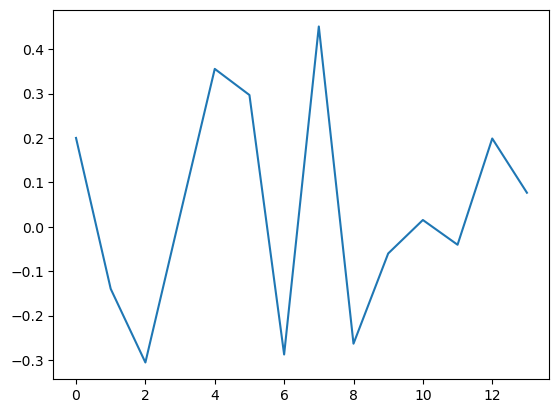

In [10]:
plt.plot(word_emb[i])

### 거리와 유사도

- 거리 d(x,y): 두 사례 x,y의 차이 표현
    - d(x,y) >=0
    - 두 사례가 같으면 0
    - d(x,y) = d(y,x)
    - d(x,y) <= d(x,z) + d(z,y)
<br>
<br>

- 유사도: 두 사례의 비슷함을 표현. 거리와 달리 엄밀한 정의는 없음

### 민코우스키 거리

$ d(x,y) = (\sum_{i}^{}\left|x_i-y_i \right|^p)^{1/p}$

- 벡터의 길이 개념인 L_p-norm을 거리에 적용한 것
- 종류:
    - 유클리드거리: p = 2인 경우, L2거리
    - 맨하탄거리: p = 1인 경우, L1거리
    - 치비셰프거리:p -> infinite 인 경우, L_infinite 거리

### 문자열의 거리

- 레벤슈타인 거리
    - 두 문자열을 같게 만들기 위해 필요한 수정의 수
    - 예: cat, data -> c삭제, d추가, a추가 ->3


- 해밍거리
    - 길이가 같은 문자열에서 같은 위치에 다른 글자가 있는 경우
    - 예: ayc, axc -> 2

### 자카드 유사도


- 교집합의 크기/ 합집합의 크기

### 유클리드 거리

- 글의 방향성을 무시하고 길이에 민감

- 짧은 글들은 거리가 모두 가까움

- 글이 길어지면 거리가 멀어짐

### 코사인 유사도

- cosθ

- θ: 원점에서 보았을 때 두 좌표의 각도

- 문서 유사도를 계산할 때 흔히 사용

- -1을 곱하면 코사인 비유사도 또는 거리

### 점곱(dot product)

- 벡터 $a = (a_1,a_2,..)$ 와 $b = (b_1,b_2,..)$ 가 있을떄 점곱은

$a\bullet b = a_1b_1 + a_2b_2+..$

- 또한

$a\bullet b = \left\|a\right\|\left\|b\right\|cosθ$

### Normalization

- Normalization: 통계에서 크기를 맞춰주는 종류의 계산들
- L2 Normalization -> 모든 문서의 원점에서 거리를 1로 맞춤
- 두 문서의 점곱과 코사인 유사도 같아짐

### 단어임베딩의 코사인 유사도

- 코사인 유사도 구하기

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(word_emb)

- 유사도 높은 단어 10개 보기

In [12]:
import numpy as np
s = np.argsort(sim[i]) #i번째 단어와 유사도 순으로 정렬
related = s[-2:12:-1]  #가장 유사도가 높은 10개
for j in related:
    print(words[j])

손상
염색
염모제
트리트먼트
최소
회복
자극
클렌징
윤기
도포
보호
건조
세척
산
피
감
기
감소
완화
컨디셔너
미용
금속
부가
아미노산
물질
일
보습
증가
예
다양
영양
동안
부여
다음
열
개선
산화
탄력
흡착
케어
스타일링
배합
발생
일반
두피
건강
시간
지속
향료
처리
후
헤어
구체
이온
향상
실시
녹차
장점
알코올
폴리머
향
피지
기포
시
료
강화
우수
종
일정
폴리쿼터늄
기술
화장
세정
보조
삽입
방법
실록
유래
섬유
관련
유용
오일
폴리
유지
이상
용도
성
관리
측면
정력
성장
뿌리
컨디셔닝
포함
가려움증
발명
양
분해
표면
표시
길이
화합물
때
음이온
실리콘
점증
조
과
복수
과정
구성
분사
억제
방향
형상
계면
모근
화학
시스템
계면활성제
효과
거품
청결
결합
투명
부재
상
디
수
전
유효
안정
나무
메틸
생성
도움
성분
압력
염
저장
상태
에센스
액상
제거
특성
흡수
오염
질량
사용
이동
각질
바디
작용
크림
세제
구조
비듬
잎
위치
제품
추출물
적합
동시
중량
상기
베타
별도
특징
수단
와
종래
타입
물
구비
개시
정제
원료
용품
린스
외부
특정
선택
판테놀
펌핑
용액
고정
단계
지지
중
량
세정제
탄소
염증
가능
필요
로션
샴푸
홈
노즐
상부
이용
사용자
공급
글리세린
자동
스펜서
하부
밀착
식물
체
부
통
백
조성
수용
단
내용물
용기
제형
비율
당귀
연장
한약재
재료
목
상면
토출
제어
고안
캡
배출
편리
액체
구
액
머리
형성
내부
제공
환경
균
하
형
면
을
의자
광택
침투
부착
공
본체
창포
적용
회전
화장품
등받이
성물
인
샤워
연결
펌프
홍삼
받침대
고삼
분리
화장료
베이스
혼합
장치
배치
비누
추가
호스
머리카락
인체
분말
마사지
방지
반응
일체
비
하단
탄성
상단
장착
천연
온도
보습제
로즈마리
천궁
돌출
재질
전체
작동
부분
샤워기
보관
조절
부작용
순환
모공
돌기
공정
내측
설치
혈액
제조
함유
손
진정
피부
기존
각종
반
발
공간
솔잎
형태
팩
목적
안전
기능
하수오
세포
유발
활용
한방
한련초
모
질환
혼합물
양모
이

### 단어 번호 찾기

In [13]:
indices = []
target = ['모발', '손상', '두피', '모공', '용기', '내용물']
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

모발 80
손상 159
두피 62
모공 78
용기 206
내용물 47


### 다차원 척도법

- 주어진 거리를 최대한 만족하는 방시긍로 점들의 좌표를 계산하여 시각화하는 방법

- 유사도를 거리로 바꿈

In [14]:
dist = 1-sim[indices,][:, indices]

- 좌표계산

In [15]:
from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', random_state=1234) # precomputed -> 미리계산해봤다
pos = mds.fit_transform(dist)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


### adjustText

- plot 에서 글자가 겹치지 않도록 조정해주는 adjustText를 설피

```
pip install adjusttext
```

- 임포트

In [17]:
from adjustText import adjust_text

### 한글 글꼴 설정

- 글꼴 이름 찾기 및 글꼴 설정

In [21]:
#mac 환경
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

### 마이너스 부호 설정

- 유키코드에는 수학의 마이너스를 나타내는 별도의 글자가 있음(−, U+2212)
-  키보드에 있는 - (U+002D)는 하이픈(예: ex-wife)

- 대부분 한글 글꼴이 유니코드 마이너스를 미지원 -> 마이너스 부호가 깨짐
- 한글 글꼴 사용시 유니코드 마이너스를 사용않도록 설정

In [22]:
#마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

### 단어 임베딩 시각화

6

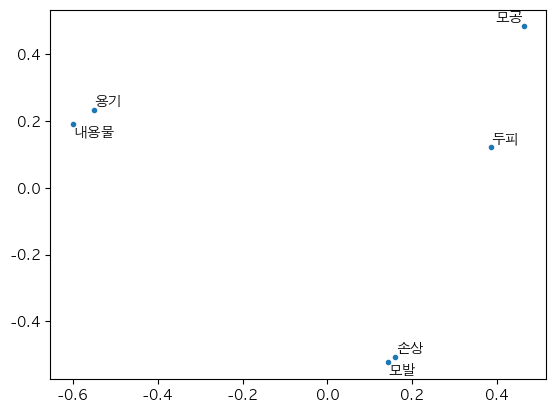

In [25]:
from adjustText import adjust_text
plt.plot(pos[:,0], pos[:,1],'.')
texts = [plt.text(pos[i,0], pos[i,1],w)for i ,w in enumerate(target)]
adjust_text(texts)

<font color="#green"><p>
## 회전

- LSA는 해가 무수히 많음
 
$X = ZW = ZR_1R_1^{-1}W = ZR_2R_2^{-1}W = ...$

- R은 kxk 형태의 행렬, $R^{-1}$ 은 역행렬

- kxk 행렬은 k차원에서 회전을 나타냄

### 회전의 선택

- 축소된 차원 내에서 축을 회전시키더라도 결과 자체는 달라지지 않음

- 결과에 대한 해석이 달라짐

- 기계적 처리에는 중요하지 않음

- 해석이 필요할 경우 적절한 회전을 선택

### VARIMAX

- 가중치(W)의 제곱의 분산(variance)을 최대화(max)하도록 회전

- 직교회전: 회전 후에도 축들이 직교 <-> 사교회전

- 하나의 토픽은 소수의 단어에만 높은 가중치

- 단순한 구조를 가지게 되어 해석이 쉬워짐

### 회전

- 설치

```
pip install factor_analyzer
```

- 회전

In [26]:
from factor_analyzer.rotator import Rotator
rotator = Rotator()
rot = rotator.fit_transform(word_emb)

- 단어와 각 토픽의 관련도를 시각화

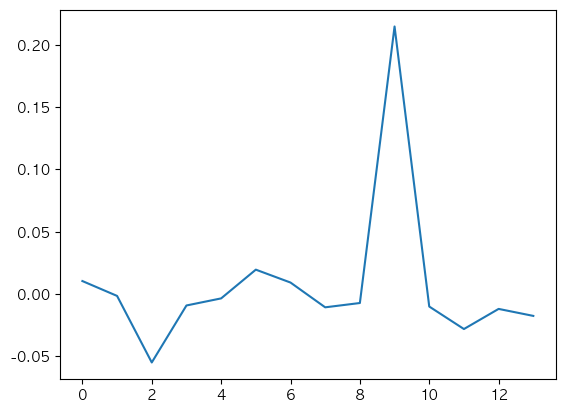

In [27]:
plt.plot(rot[i])

### 관련도 높은 토픽 보기


- i번 단어와 가장 관련도가 큰 토픽 번호

In [29]:
t = np.argmax(rot[i])

- t번 토픽과 관련도가 큰 단어들

In [30]:
topic_words_idx = np.argsort(rot[:,t])

- 관련도 순으로 출력

In [32]:
for j in topic_words_idx[-1:-11:-1]:
    print(words[j])

용기
형성
내용물
펌프
액체
배출
수용
외부
구성
발명
